In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#数据格式化

datafile = open('Fe-log.lammps', 'r', encoding='utf-8')
datas = datafile.readlines()
#print(type(datas))
datalist = []
for i in range(len(datas)-1):
    datas[i] = ' '.join(datas[i].split())
    datalist.append(datas[i])

#print(datalist)
    
datafile.close()



datafile = open('Fe-log.txt', 'w')

data = '\n'.join(datalist)

datafile.write(data)

datafile.close()


In [49]:
contents = pd.read_csv('Fe-log.txt', sep=' ')

star = int(input("起始行数："))

end = int(input("结束行数："))

contents = contents.iloc[star: end+1, :]

#contents = contents.drop(0)

contents.head()

起始行数：9000
结束行数：9900


,Step,Temp,PotEng,c_msd_all[4],v_twopoint_all,v_fitslope_all
9000,9000000,302.38166,-16326.119,0.028047,5.193853e-07,-0.000154
9001,9001000,297.43353,-16323.661,0.028282,5.236778e-07,-0.000057
9002,9002000,295.44709,-16326.333,0.027560,5.102516e-07,-0.000035
9003,9003000,304.30961,-16322.809,0.027760,5.138977e-07,-0.000025
9004,9004000,293.80406,-16327.226,0.028433,5.262990e-07,-0.000020


In [50]:
Step = contents['Step']/1000

Temp = contents['Temp']

PE = contents['PotEng']

msd_Fe = contents['c_msd_all[4]']

v_twopoint_Fe = contents['v_twopoint_all']

v_fitslope_Fe = contents['v_fitslope_all']

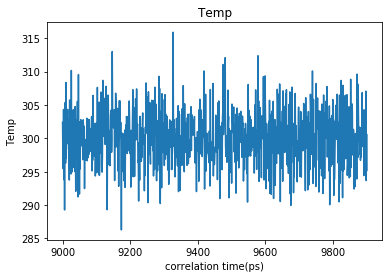

In [51]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Temp")
plt.plot(Step, Temp)
plt.title('Temp')

plt.show()

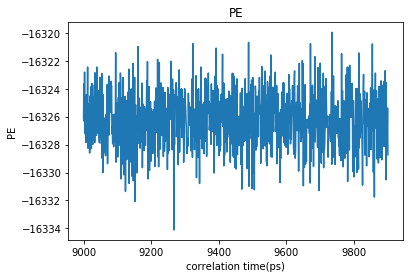

In [52]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("PE")
plt.plot(Step, PE)
plt.title('PE')

plt.show()

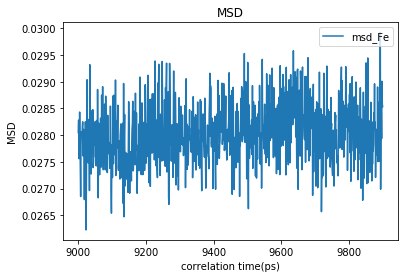

In [53]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("MSD")
plt.plot(Step, msd_Fe, label='msd_Fe')
plt.legend(loc="upper right")
plt.title('MSD')

plt.show()

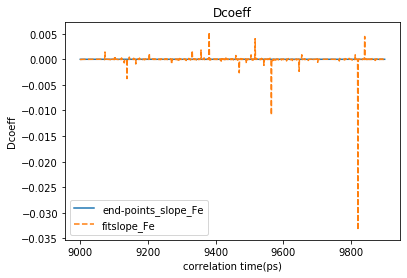

In [54]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Dcoeff")
plt.plot(Step, v_twopoint_Fe, linestyle='-', label='end-points_slope_Fe')
plt.plot(Step, v_fitslope_Fe, linestyle='--', label='fitslope_Fe')
plt.legend(loc="lower left")
plt.title('Dcoeff')

plt.show()